In [32]:
import itertools
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
from sunpy.time import parse_time
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [3]:
# Newly found C-class flare

flare_spe = ['2013-11-09 06:22', '2013-11-09 06:38', '2013-11-09 06:47']
flare_start = flare_spe[0]
flare_peak = flare_spe[1] 
flare_end = flare_spe[2]

pre_flare = '2013-11-09 06:15'
post_flare = '2013-11-09 07:10'


In [141]:
# # SOL2014-01-28 M3.5

# flare_spe = ['2014-01-28 15:24', '2014-01-28 15:26', '2014-01-28 15:30']

# flare_start = flare_spe[0]
# flare_peak =flare_spe[1] 
# flare_end = flare_spe[2]

# pre_flare = '2014-01-28 15:23'
# post_flare = '2014-01-28 15:30'

# # SOL2010-06-12 M2.0

# flare_spe = ['2010-06-12 00:30', '2010-06-12 00:57', '2010-06-12 01:02']

# flare_start = flare_spe[0]
# flare_peak =flare_spe[1] 
# flare_end = flare_spe[2]

# pre_flare = '2010-06-12 00:55'
# post_flare = '2010-06-12 01:02'

In [5]:
a.Instrument

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"
cerrotololo,VSO,Cerro Tololo,"Cerro Tololo, Chile GONG+ site"
chp,VSO,chp,Chromospheric Helium-I Imaging Photometer


In [142]:
########
# GOES #
########

goes_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.goes
)

##########
# RHESSI #
##########

rhessi_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.rhessi
)

tr = a.Time(pre_flare, post_flare)

results = Fido.search(
    tr,
    (
        a.Instrument.xrs &
        a.goes.SatelliteNumber(15) &
        a.Resolution("avg1m") |
        a.hek.FL &
        (a.hek.FRM.Name == 'SWPC')
    )
)  # NOQA

#########
# FERMI #
#########

fermi_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.gbm,
    a.Detector.n4
)

#######
# EVE #
#######

eve_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.eve
)

#######
# EIS #
#######

eis_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.eis
)

#######
# SOT #
#######

sot_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.sot
)

#######
# XRT #
#######

xrt_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.xrt
)


Files Downloaded: 0file [00:00, ?file/s]

AttributeError: 'list' object has no attribute 'plot'

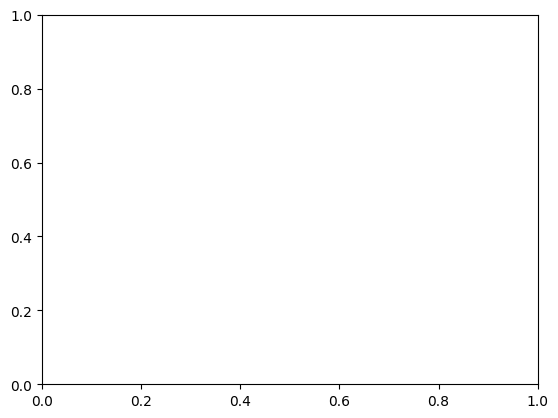

In [7]:
files = Fido.fetch(results)
goes = TimeSeries(files)

hek_results = results['hek']
flares_hek = hek_results[0]

fig, ax = plt.subplots()
goes.plot(axes=ax)
ax.axvline(parse_time(flares_hek['event_peaktime']).datetime)
ax.axvspan(
    parse_time(flares_hek['event_starttime']).datetime,
    parse_time(flares_hek['event_endtime']).datetime,
    alpha=0.2, label=flares_hek['fl_goescls']
)
ax.legend(loc=2)
ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())

plt.show()

In [8]:
# [0,2] - New C-class SOL2013-11-09
# [0,1] - M3.5 SOL2014-01-28
# [0,0] - M2.0 SOL2010-06-12
print(goes_fido_result[0,0])
print()
print(rhessi_fido_result[0,0])
print()
print(fermi_fido_result[0,0])
print()
# print(eve_fido_result[1,:])
print(eve_fido_result[1,0])
# print()
# print(eis_fido_result[0,0])
# print()
# print(sot_fido_result)
# print()
print(xrt_fido_result[0,0])

       Start Time               End Time        Instrument SatelliteNumber  Physobs                                                                                 url                                                                               Source Provider Resolution
----------------------- ----------------------- ---------- --------------- ---------- --------------------------------------------------------------------------------------------------------------------------------------------------------------- ------ -------- ----------
2010-06-12 00:00:00.000 2010-06-12 23:59:59.999       GOES              14 irradiance https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/xrs/goes14/gxrs-l2-irrad_science/2010/06/sci_gxrs-l2-irrad_g14_d20100612_v0-0-0.nc   GOES     NOAA      flx1s

       Start Time               End Time        Instrument      Physobs       Source Provider                                           url                                         

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  1.36file/s]


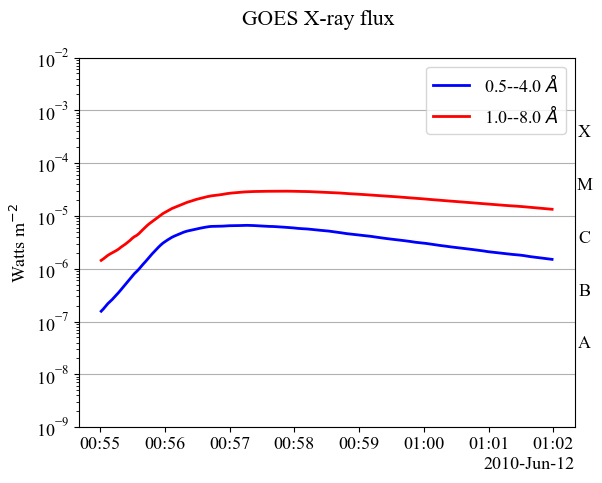

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  2.17file/s]


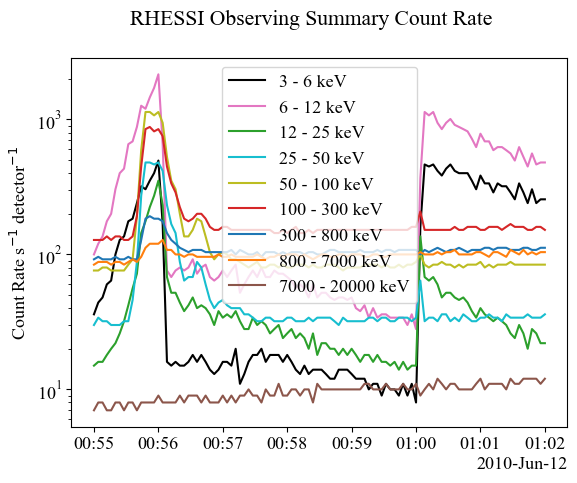

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  2.32file/s]
c:\Users\James\Documents\Coding\sff_experimentation\venv\Lib\site-packages\sunpy\timeseries\sources\fermi_gbm.py:228: RuntimeWarning: invalid value encountered in divide
  summary_counts.append(summed_counts/energy_width/count_data["exposure"])


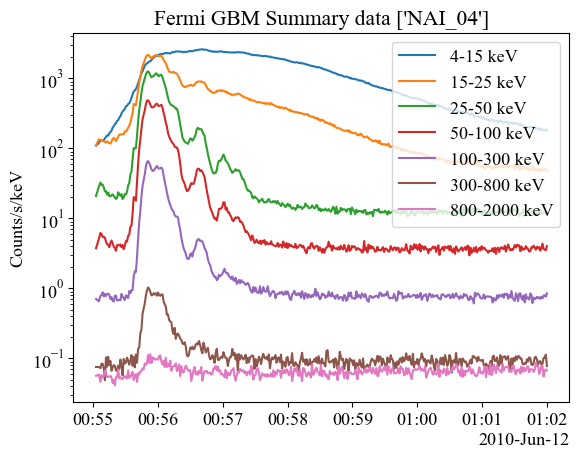

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  1.83file/s]


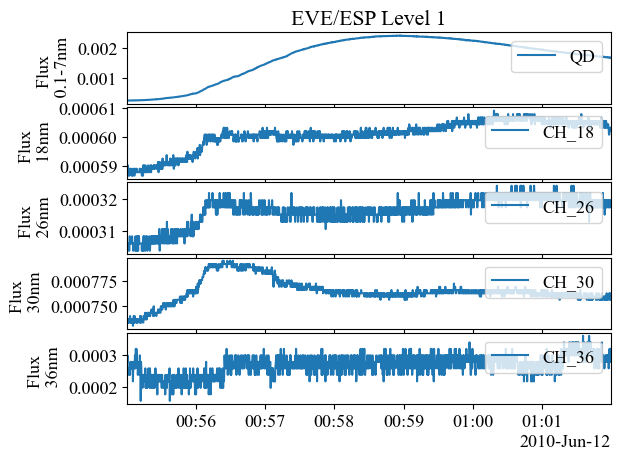

In [143]:
########
# GOES #
########

goes_files = Fido.fetch(
    # [0,2] - New C-class SOL2013-11-09
    # [0,0] - M3.5 SOL2014-01-28
    # [0,0] - M2.0 SOL2010-06-12
    goes_fido_result[0,0],
    path='light_curve_data'
) 

goes = TimeSeries(goes_files).truncate(pre_flare, post_flare)

goes.peek()

df = goes.to_dataframe()
df = df[(df["xrsa_quality"] == 0) & (df["xrsb_quality"] == 0)]
goes = TimeSeries(df, goes.meta, goes.units)

##########
# RHESSI #
##########

rhessi_files = Fido.fetch(
    rhessi_fido_result[0,0],
    path='light_curve_data'
)

rhessi = TimeSeries(rhessi_files).truncate(pre_flare, post_flare)

rhessi.peek()

#########
# FERMI #
#########

fermi_files = Fido.fetch(
    fermi_fido_result[0,0],
    path='light_curve_data'
)

fermi = TimeSeries(fermi_files).truncate(pre_flare, post_flare)

fermi.peek()

#######
# EVE #
#######

eve_files = Fido.fetch(
    eve_fido_result[1,0],
    path='light_curve_data'
)

eve = TimeSeries(eve_files).truncate(pre_flare, post_flare)

eve.peek()


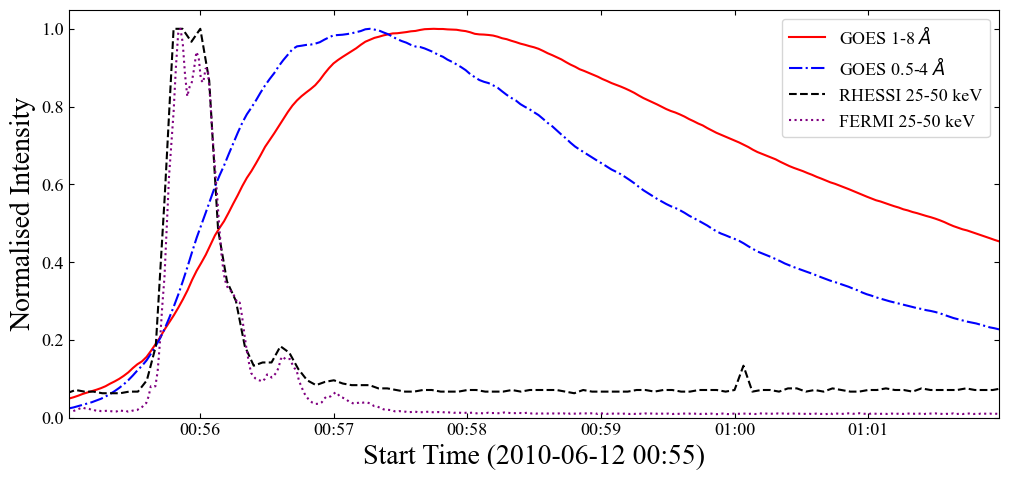

In [144]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots(
    figsize=(12, 6)
)

########
# GOES #
########

goes_df = goes.to_dataframe().reset_index(names='datetime')

goes_df['xrsa_normalised'] = goes_df['xrsa'] / max(goes_df['xrsa'])
goes_df['xrsb_normalised'] = goes_df['xrsb'] / max(goes_df['xrsb'])

goes_df.plot(
    ax=ax,
    x='datetime',
    y=['xrsb_normalised', 'xrsa_normalised'],
    color=['red', 'blue'],
    label=['GOES 1-8 $\AA$', 'GOES 0.5-4 $\AA$'],
    style=['-', '-.']
)

##########
# RHESSI #
##########

rhessi_df = rhessi.to_dataframe().reset_index(names='datetime')

rhessi_df['hxr_normalised'] = rhessi_df['25 - 50 keV'] / max(rhessi_df['25 - 50 keV'])

rhessi_df.plot(
    ax=ax,
    x='datetime',
    y='hxr_normalised',
    color='black',
    label='RHESSI 25-50 keV',
    linestyle='--'
)

#############
# Fermi GBM #
#############

fermi_df = fermi.to_dataframe().reset_index(names='datetime')

fermi_df['hxr_normalised'] = fermi_df['25-50 keV'] / max(fermi_df['25-50 keV'])

fermi_df.plot(
    ax=ax,
    x='datetime',
    y='hxr_normalised',
    color='purple',
    label='FERMI 25-50 keV',
    linestyle=':'
)

##########
# MEGS-A #
##########

eve_df = eve.to_dataframe().reset_index(names='datetime')

eve_df['QD_normalised'] = eve_df['QD'] / max(eve_df['QD'])
# eve_df['QD_normalised'] = (eve_df['QD']-eve_df['QD'].min())/(eve_df['QD'].max()-eve_df['QD'].min())
# eve_df['CH_18_normalised'] = (eve_df['CH_18']-eve_df['CH_18'].min())/(eve_df['CH_18'].max()-eve_df['CH_18'].min())
# eve_df['CH_26_normalised'] = (eve_df['CH_26']-eve_df['CH_26'].min())/(eve_df['CH_26'].max()-eve_df['CH_26'].min())
# eve_df['CH_30_normalised'] = (eve_df['CH_30']-eve_df['CH_30'].min())/(eve_df['CH_30'].max()-eve_df['CH_30'].min())

# eve_df.plot(
#     ax=ax,
#     x='datetime',
#     y=[
#         'QD_normalised',
#         # 'CH_18_normalised',
#         # 'CH_26_normalised',
#         # 'CH_30_normalised'
#     ],
#     color=[
#         'y',
#         # 'm',
#         # 'c',
#         # 'g'
#     ],
#     label=[
#         'EVE 1-70 $\AA$',
#         # 'EVE 180 $\AA$',
#         # 'EVE 260 $\AA$',
#         # 'EVE 300 $\AA$'
#     ]
# )

##############
# Formatting #
##############


plt.ylim(bottom=0)
plt.xlim(
    left=goes_df['datetime'].min(),
    right=goes_df['datetime'].max()
)

myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel(
    f'Start Time ({goes_df["datetime"][0].strftime("%Y-%m-%d %H:%M")})',
    fontsize=20
)

ax.set_ylabel(
    'Normalised Intensity',
    fontsize=20
)

ax.tick_params(
    axis='x',
    labelsize=13,
    rotation=0,
    direction='in',
    top=True,
    labelbottom=True
)
ax.tick_params(
    axis='y',
    labelsize=13,
    which='both',
    direction='in',
    right=True,
    labelbottom=True
)

for label in ax.get_xticklabels():
    label.set_horizontalalignment('center')

plt.show()